# Tutorial on Hyperdimensional Computing
Translation to Python+numpy from https://michielstock.github.io/posts/2022/2022-10-04-HDVtutorial/

In [234]:
import math
import random
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt
import pandas as pd


In [235]:
N = 10000

def hdv() -> np.ndarray:
    return np.random.choice([-1, 1], size=N)

In [236]:
x = hdv()
x

array([-1, -1,  1, ...,  1, -1,  1], shape=(10000,))

In [237]:
y = hdv()
y

array([ 1, -1, -1, ...,  1,  1,  1], shape=(10000,))

In [238]:
np.sum(x == y)

np.int64(5068)

In [239]:
def hdv_m(rows: int) -> NDArray:
    return np.random.choice([-1, 1], size=(rows, N))

In [240]:
V = hdv_m(10)
V

array([[ 1, -1,  1, ...,  1, -1,  1],
       [ 1,  1,  1, ...,  1, -1, -1],
       [ 1,  1, -1, ..., -1, -1,  1],
       ...,
       [ 1, -1,  1, ..., -1, -1,  1],
       [ 1,  1,  1, ...,  1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]], shape=(10, 10000))

## Bundling

In [241]:
def bundle_m(U: NDArray[int]) -> NDArray[int]:
    if U.ndim != 2:
        raise ValueError("U must be a 2d array.")

    return np.sign(np.sum(U, axis=0))

# example
U = np.array([[1, 2],
              [-3, 4],
              [5, -6]])

result = bundle_m(U)
print(result)

[1 0]


In [242]:
bundle_m(V)

array([ 1,  0,  1, ...,  1, -1,  0], shape=(10000,))

In [243]:
def bundle(*xs: NDArray[int]) -> NDArray[int]:
    summed = np.add.reduce(xs)
    return np.sign(summed)

# example
xs = bundle(np.array([1, 2]),
            np.array([-3, 4]),
            np.array([5, -6]))
print(xs)

[1 0]


In [244]:
bundle(x, y)

array([ 0, -1,  0, ...,  1,  0,  1], shape=(10000,))

## Binding

In [245]:
def bind(*xs: NDArray[int]):
    return np.multiply.reduce(xs)

# example
xs = bind(np.array([1, 2]), np.array([-3, 4]), np.array([5, -6]))
bind(xs)

array([-15, -48])

In [246]:
bind(x, y)

array([-1,  1, -1, ...,  1, -1,  1], shape=(10000,))

In [247]:
np.array_equal(bind(bind(x, y), y),
               x)

True

In [248]:
np.array_equal(bind(bind(x, y), x), y)

True

## Shifting

In [249]:
def shift(x, k=1):
    return np.roll(x, k)

# example
shift([1, 2, 3])

array([3, 1, 2])

## Similarity between HDVs

In [250]:
def cos_similarity(x, y):
    return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

# example
cos_similarity([1, 2, 3],
               [4, 5, 6])

np.float64(0.9746318461970762)

In [251]:
cos_similarity(x, y)

np.float64(0.0136)

## Properties of the operations

In [252]:
z = hdv()

In [253]:
np.array_equal(bind(x, bundle(y, z)),
               bundle(bind(x, y), bind(x, z)))

True

In [254]:
np.array_equal(cos_similarity(x,y),
               cos_similarity(bind(x, z), bind(y, z)))

True

# Examples

## Example 1: color matching

#### Variables required by the example

In [255]:
from matplotlib.colors import XKCD_COLORS

def filter_colors(stem):
    retval = [tuple(int(XKCD_COLORS[name][i:i+2], 16) / 255 for i in (1, 3, 5))
        for name in XKCD_COLORS if stem in name]
    return retval

reds = filter_colors('red')
blues = filter_colors('blue')
greens = filter_colors('green')
oranges = filter_colors('orange')
greys = filter_colors('grey')
yellows = filter_colors('yellow')
whites = filter_colors('white')

emojis_colors = {
    '🚒': reds,
    '💦': blues,
    '🌱': greens,
    '🌅': oranges,
    '🐺': greys,
    '🍌': yellows,
    '🥚': whites
}

emojis = list(emojis_colors.keys())

toy_data1 = [(emoji := random.choice(emojis), random.choice(emojis_colors[emoji]))
             for _ in range(100)]

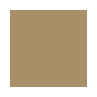

In [256]:
def randcol():
    return np.random.rand(3)

def show_color(color):
    plt.figure(figsize=(1,1))
    plt.imshow([[color]])
    plt.axis('off')
    plt.show()

acolor = randcol()
show_color(acolor)

In [257]:
emojis_hdvs = {emoji: hdv() for emoji in emojis}

In [258]:
def range_hdvs(steps):
    k = len(steps) - 1

    V = hdv_m(k + 1)  # V size is (k+1)xN

    for i in range(1, k + 1):  # for each other row/step
        for j in range(N):     # for each column
            V[i, j] = -V[i-1, j] if random.random() < (1 / k) else V[i-1, j]

    return V


In [259]:
color_steps = np.arange(0, 1.05, 0.05)

In [260]:
reds_hdv = range_hdvs(color_steps)

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20
V0,0.1172,0.1340,0.1446,0.1692,0.1796,0.1988,0.2188,0.2514,0.2798,0.3092,...,0.3856,0.4300,0.4772,0.5302,0.5958,0.6642,0.7432,0.8184,0.8992,1.0000
V1,0.1416,0.1608,0.1718,0.1968,0.2096,0.2324,0.2552,0.2898,0.3206,0.3504,...,0.4348,0.4796,0.5308,0.5874,0.6618,0.7366,0.8248,0.9092,1.0000,0.8992
V2,0.1572,0.1760,0.1890,0.2144,0.2332,0.2588,0.2824,0.3234,0.3570,0.3964,...,0.4832,0.5312,0.5876,0.6522,0.7294,0.8098,0.9064,1.0000,0.9092,0.8184
V3,0.1764,0.1976,0.2122,0.2388,0.2588,0.2856,0.3148,0.3542,0.3934,0.4352,...,0.5320,0.5840,0.6428,0.7166,0.8018,0.8942,1.0000,0.9064,0.8248,0.7432
V4,0.1982,0.2190,0.2376,0.2658,0.2874,0.3186,0.3506,0.3936,0.4344,0.4810,...,0.5890,0.6446,0.7134,0.8000,0.8984,1.0000,0.8942,0.8098,0.7366,0.6642
V5,0.2178,0.2402,0.2616,0.2914,0.3166,0.3538,0.3922,0.4424,0.4896,0.5406,...,0.6554,0.7190,0.7978,0.8916,1.0000,0.8984,0.8018,0.7294,0.6618,0.5958
V6,0.2374,0.2638,0.2892,0.3226,0.3534,0.3934,0.4354,0.4860,0.5384,0.5970,...,0.7294,0.8054,0.8966,1.0000,0.8916,0.8000,0.7166,0.6522,0.5874,0.5302
V7,0.2640,0.2960,0.3246,0.3628,0.3960,0.4400,0.4916,0.5442,0.6026,0.6676,...,0.8156,0.9004,1.0000,0.8966,0.7978,0.7134,0.6428,0.5876,0.5308,0.4772
V8,0.2900,0.3248,0.3586,0.4000,0.4376,0.4860,0.5404,0.5994,0.6610,0.7372,...,0.9028,1.0000,0.9004,0.8054,0.7190,0.6446,0.5840,0.5312,0.4796,0.4300
V9,0.3140,0.3532,0.3914,0.4376,0.4840,0.5376,0.5956,0.6602,0.7322,0.8136,...,1.0000,0.9028,0.8156,0.7294,0.6554,0.5890,0.5320,0.4832,0.4348,0.3856


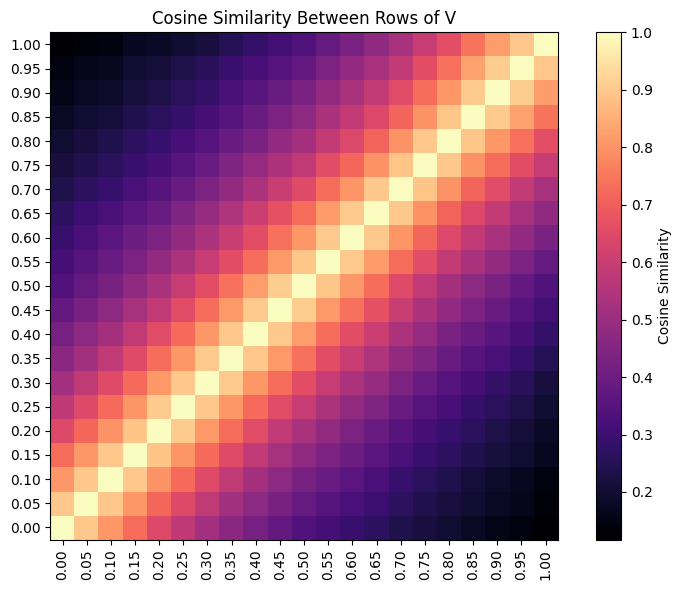

In [261]:
from sklearn.metrics.pairwise import cosine_similarity

# Calcular la matriz de similaridad coseno
cos_sim_matrix = cosine_similarity(reds_hdv)
cos_sim_matrix = cos_sim_matrix[::-1, :]

# Representar la matriz de similaridad como DataFrame para mejor visualización
df_cos_sim = pd.DataFrame(cos_sim_matrix,
                          index=[f"V{i}" for i in range(reds_hdv.shape[0])],
                          columns=[f"V{i}" for i in range(reds_hdv.shape[0])])

# Mostrar en formato tabla
display(df_cos_sim)

# Representar la matriz de similaridad coseno con un mapa de calor
plt.figure(figsize=(8, 6))
plt.imshow(cos_sim_matrix, cmap='magma', interpolation='nearest')
plt.colorbar(label='Cosine Similarity')
plt.title("Cosine Similarity Between Rows of V")
plt.xticks(ticks=np.arange(len(color_steps)),
           labels=[f"{val:.2f}" for val in color_steps], rotation=90)
plt.yticks(ticks=np.arange(len(color_steps)),
           labels=[f"{val:.2f}" for val in color_steps[::-1]])

plt.tight_layout()
plt.show()


In [262]:
greens_hdv = range_hdvs(color_steps)
blues_hdv = range_hdvs(color_steps)

In [263]:
def col_ind(component):
    return round(component * 20)

def encode_col(color):
    return bind(reds_hdv[col_ind(color[0])],
                greens_hdv[col_ind(color[1])],
                blues_hdv[col_ind(color[2])])

In [264]:
colhdv = encode_col(acolor)

In [265]:
ref_colors = [{'color':c, 'hdv':encode_col(c)} for c in [randcol() for _ in range(1000)]]

In [266]:
def decode_colors(v):
    best_match = max(ref_colors, key=lambda item: cos_similarity(v, item["hdv"]))
    show_color(best_match["color"])
    return best_match["color"]

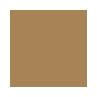

array([0.66156676, 0.51738994, 0.33693807])

In [267]:
decode_colors(colhdv)

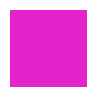

array([0.90150288, 0.13909705, 0.79531983])

In [268]:
decode_colors(hdv())

In [269]:
def encode_emoji_col_pair(s, c):
    return bind(emojis_hdvs[s], encode_col(c))

In [270]:
col_emoji_hdvs = [encode_emoji_col_pair(s, c) for s, c in toy_data1]

In [271]:
toy_data_emb = bundle(*col_emoji_hdvs)

In [272]:
bind(toy_data_emb, emojis_hdvs['🚒'])

array([-1,  1, -1, ..., -1,  1, -1], shape=(10000,))

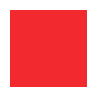

array([0.95602139, 0.16172861, 0.19057603])

In [273]:
decode_colors(bind(toy_data_emb, emojis_hdvs['🚒']))

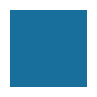

array([0.09685304, 0.43628688, 0.61083241])

In [274]:
decode_colors(bind(toy_data_emb, emojis_hdvs['💦']))

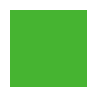

array([0.27798909, 0.70862511, 0.19606828])

In [276]:
decode_colors(bind(toy_data_emb, emojis_hdvs['🌱']))

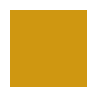

array([0.81344365, 0.59418753, 0.06852356])

In [277]:
decode_colors(bind(toy_data_emb, emojis_hdvs['🍌']))